# Data Preprocessing

The following notebook involves process of 
- Data Ingestion (Data Downloading and loading)
- Splitting data into train and test split
- Exploring data
- Preprocessing it to be fed into the model

## Importing Libraries

In [1]:
import pandas as pd
import os
import urllib.request
import pathlib
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hyperparameters and global variables

In [2]:
DATASET_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
base_path = pathlib.Path('../datasets')
file_name = 'article_category.csv'
valid_split, test_split = 0.2, 0.2
train_split = 1 - (valid_split + test_split)
seed = 42

## Loading and downloading data

In [3]:
def download_data(URL, base_path, file_name = 'dataset.csv'):
    path = base_path/file_name
    if not path.is_file():
        urllib.request.urlretrieve(URL, path)
    return path

In [4]:
data_path = download_data(DATASET_URL, base_path, file_name)
df = pd.read_csv(data_path)
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           764 non-null    int64 
 1   created_on   764 non-null    object
 2   title        764 non-null    object
 3   description  764 non-null    object
 4   tag          764 non-null    object
dtypes: int64(1), object(4)
memory usage: 30.0+ KB


In [6]:
# Splitting data
train_data, valid_test_data = train_test_split(df, train_size=train_split, 
                                               random_state=seed, stratify=df['tag'])
valid_data, test_data = train_test_split(valid_test_data, train_size=valid_split/(valid_split+test_split), 
                                         random_state=seed, stratify=valid_test_data['tag'])

print(f'Number of Training samples: {len(train_data)}')
print(f'Number of Validation samples: {len(valid_data)}')
print(f'Number of Testing samples: {len(test_data)}')

Number of Training samples: 458
Number of Validation samples: 153
Number of Testing samples: 153


Verify that the distribution of output is same across the split. (This is done by specifying the stratify)

In [7]:
train_distribution = pd.DataFrame(train_data['tag'].value_counts(normalize = True)).reset_index()
train_distribution.columns = ['Tag-Category', 'Train']

valid_distribution = pd.DataFrame(valid_data['tag'].value_counts(normalize = True)).reset_index()
valid_distribution.columns = ['Tag-Category', 'valid']

test_distribution = pd.DataFrame(test_data['tag'].value_counts(normalize = True)).reset_index()
test_distribution.columns = ['Tag-Category', 'test']

In [8]:
test_distribution

,Tag-Category,test
0,natural-language-processing,0.405229
1,computer-vision,0.372549
2,other,0.137255
3,mlops,0.084967


In [9]:
all_distribution = train_distribution.join(valid_distribution.set_index('Tag-Category'), 
                                           on = 'Tag-Category').join(
                                               test_distribution.set_index('Tag-Category'), 
                                               on = 'Tag-Category')
all_distribution.head()

,Tag-Category,Train,valid,test
0,natural-language-processing,0.406114,0.405229,0.405229
1,computer-vision,0.373362,0.372549,0.372549
2,other,0.137555,0.143791,0.137255
3,mlops,0.082969,0.078431,0.084967


In [10]:
all_distribution_melt = all_distribution.melt(id_vars='Tag-Category', var_name='split')
all_distribution_melt.head()

,Tag-Category,split,value
0,natural-language-processing,Train,0.406114
1,computer-vision,Train,0.373362
2,other,Train,0.137555
3,mlops,Train,0.082969
4,natural-language-processing,valid,0.405229


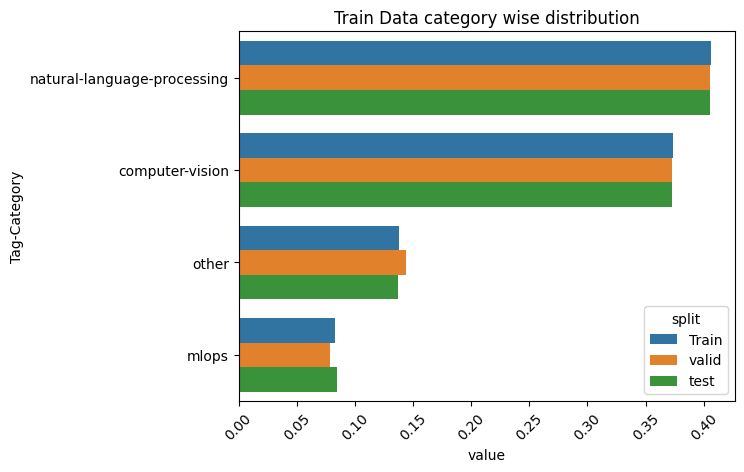

In [11]:
sns.barplot(all_distribution_melt, y = 'Tag-Category', x = 'value', hue = 'split')
plt.tick_params('x', rotation=45)
plt.title('Train Data category wise distribution');

So we can clearly see that the split result in similar distribution of each category